In [1]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py
import sys
sys.path.append('../py_files/')
sys.path.append('/home/pranavsatheesh/arepo_package/')
#import weights
import control_sample as control
import arepo_package as arepo
from tqdm import tqdm
import os
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path

import scienceplots
plt.style.use('science')

In [2]:
pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/' 
basePath="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/SM5_LW10_TNG/"
simName = basePath.split('/')[-2]

In [3]:
brahma_pop_Nstar10 = control.load_pop_file(basePath,pop_file_path,[0,0,10,1])

In [13]:
brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)

processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 654.35it/s]

Number of cases where a close enough match is not found within the acceptable tolerance: 117
number of processable mergers with valid controls:
526


Text(0.5, 0.98, 'Brahma SM5_LW10_TNG')

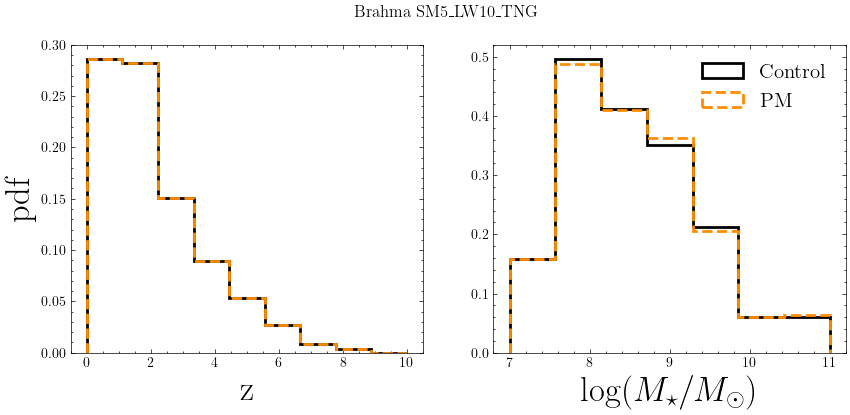

In [14]:
fig,axes = brahma_control.match_z_Mstar_plot(Mstar_binsize=0.5,Mstar_min = 7,
Mstar_max = 11,z_binsize=1,z_min=0.0,z_max=10)
fig.suptitle("Brahma "+simName)

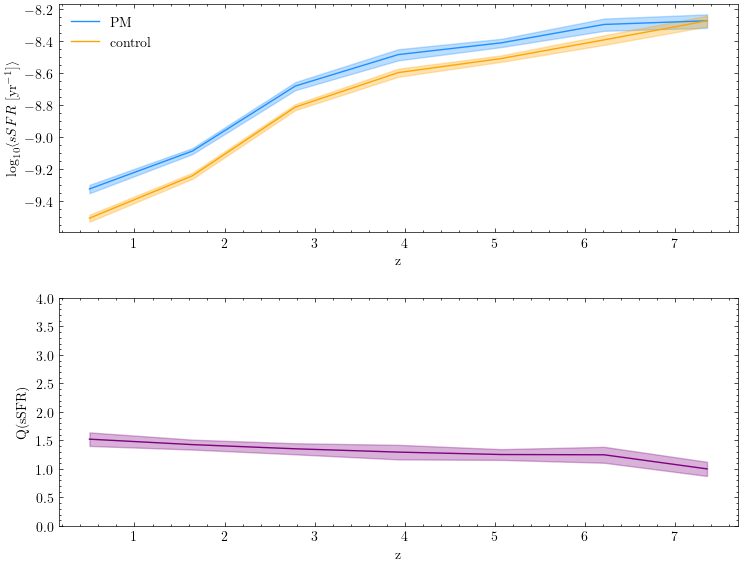

In [19]:
fig,axes = brahma_control.plot_sSFR_evolution(z_min = 0,z_max = 8,z_binsize =1)
fig.set_size_inches(8,6)

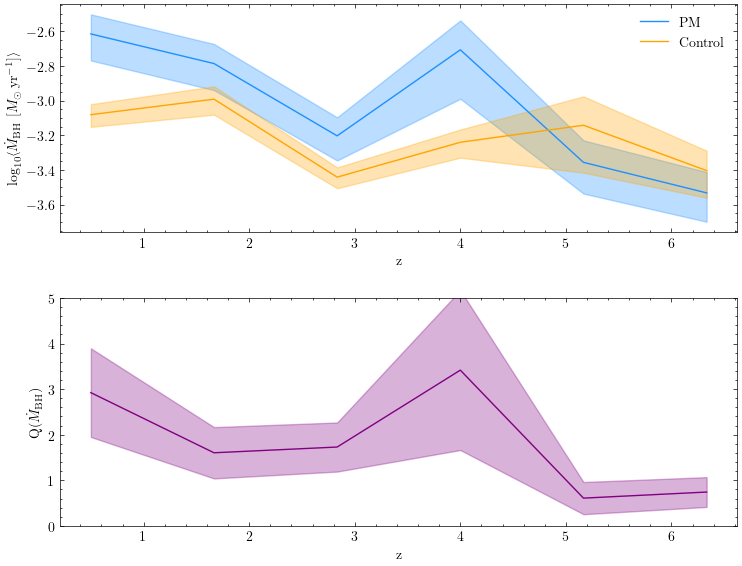

In [10]:
fig,axes = brahma_control.plot_mdot_evolution(z_min = 0,z_max = 7,z_binsize =1)
fig.set_size_inches(8,6)

In [27]:
sSFR_enhancements = []
sSFR_enhancement_Mstar = []
sSFR_enhancement_z = []

In [33]:
for PM_i in range(len(brahma_control.sSFR_merging_pop)):
    if brahma_control.sSFR_merging_pop[PM_i] > 0 and brahma_control.sSFR_control_pop[PM_i]>0:
        sSFR_enhancements.append(brahma_control.sSFR_merging_pop[PM_i]/brahma_control.sSFR_control_pop[PM_i])
        sSFR_enhancement_Mstar.append(brahma_control.Mstar_merging_pop[PM_i])
        sSFR_enhancement_z.append(brahma_control.z_merging_pop[PM_i])


In [76]:
np.log10(sSFR_enhancement_Mstar[sSFR_enhancements>40])

array([6.9032737 , 7.62911649])

In [45]:
for i in range(np.sum(valid_control_mask)):
    SFR_merging_i = merging_pop['SFR'][:][valid_control_mask][i]
    Mstar_merging_i = merging_pop['Mstar'][:][valid_control_mask][i]
    z_merging_i = merging_pop['z'][:][valid_control_mask][i]
    sSFR_merging_i = SFR_merging_i / Mstar_merging_i if Mstar_merging_i > 0 else 0

    SFR_control_i = non_merging_SFR[control_indices[0][valid_control_mask]][i]
    Mstar_control_i = non_merging_Mstar[control_indices[0][valid_control_mask]][i]
    sSFR_control_i = SFR_control_i / Mstar_control_i

    if (sSFR_merging_i>0)&(sSFR_control_i>0):
        sSFR_enhancement = np.log10(sSFR_merging_i / sSFR_control_i)
        sSFR_enhancements.append(sSFR_enhancement)
        sSFR_enhancement_Mstar.append(Mstar_merging_i)
        sSFR_enhancement_z.append(z_merging_i)

In [35]:
sSFR_enhancements = np.array(sSFR_enhancements)
sSFR_enhancement_Mstar = np.array(sSFR_enhancement_Mstar)
sSFR_enhancement_z = np.array(sSFR_enhancement_z)


In [38]:
z_bins 

array([ 0,  2,  4,  6,  8, 10, 12])

In [39]:
def sSFR_returns(z_l,z_u,Mstar_l,Mstar_u):
    sSFR_enhancements_per_zbins = sSFR_enhancements[(sSFR_enhancement_z>=z_l)&(sSFR_enhancement_z<z_u)&(sSFR_enhancement_Mstar>=Mstar_l)&(sSFR_enhancement_Mstar<Mstar_u)]
    return sSFR_enhancements_per_zbins

In [104]:
Mstar_bins = 10**(np.arange(8,12,0.5))

In [105]:
z_bins = np.arange(0,8,1)

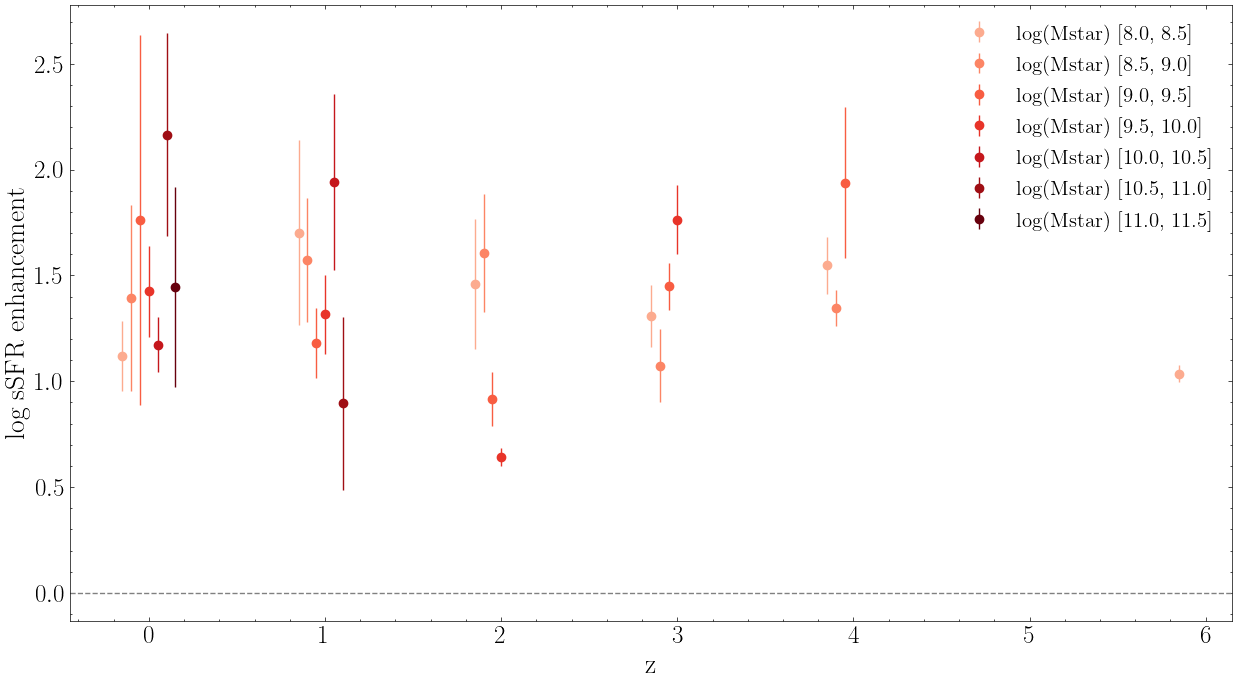

In [106]:
plt.figure(figsize=(15,8))
colors = plt.cm.Reds(np.linspace(0.3, 1, len(Mstar_bins)-1))
offset = 0.05  # adjust as needed for visual separation
for j in range(len(Mstar_bins)-1):
    Mstar_l = Mstar_bins[j]
    Mstar_u = Mstar_bins[j+1]
    sSFR_means = []
    sSFR_stds = []
    z_centers = []
    for i in range(len(z_bins)-1):
        z_l = z_bins[i]
        z_u = z_bins[i+1]
        sSFR_bin = sSFR_returns(z_l, z_u, Mstar_l, Mstar_u)
        if len(sSFR_bin) > 0:
            sSFR_means.append(np.median(sSFR_bin))
            sSFR_stds.append(np.std(sSFR_bin)/np.sqrt(len(sSFR_bin))) #`SEM`
            z_centers.append(z_l)
    # Apply offset to x-axis points
    z_centers_offset = [zc + offset * (j - (len(Mstar_bins)-2)/2) for zc in z_centers]
    plt.errorbar(z_centers_offset, sSFR_means, yerr=sSFR_stds, fmt='o', color=colors[j], label=f'log(Mstar) [{np.log10(Mstar_l):.1f}, {np.log10(Mstar_u):.1f}]')

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('z', fontsize=20)
plt.ylabel('log sSFR enhancement', fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

For TNG-50 (from schechter et al. (2025))

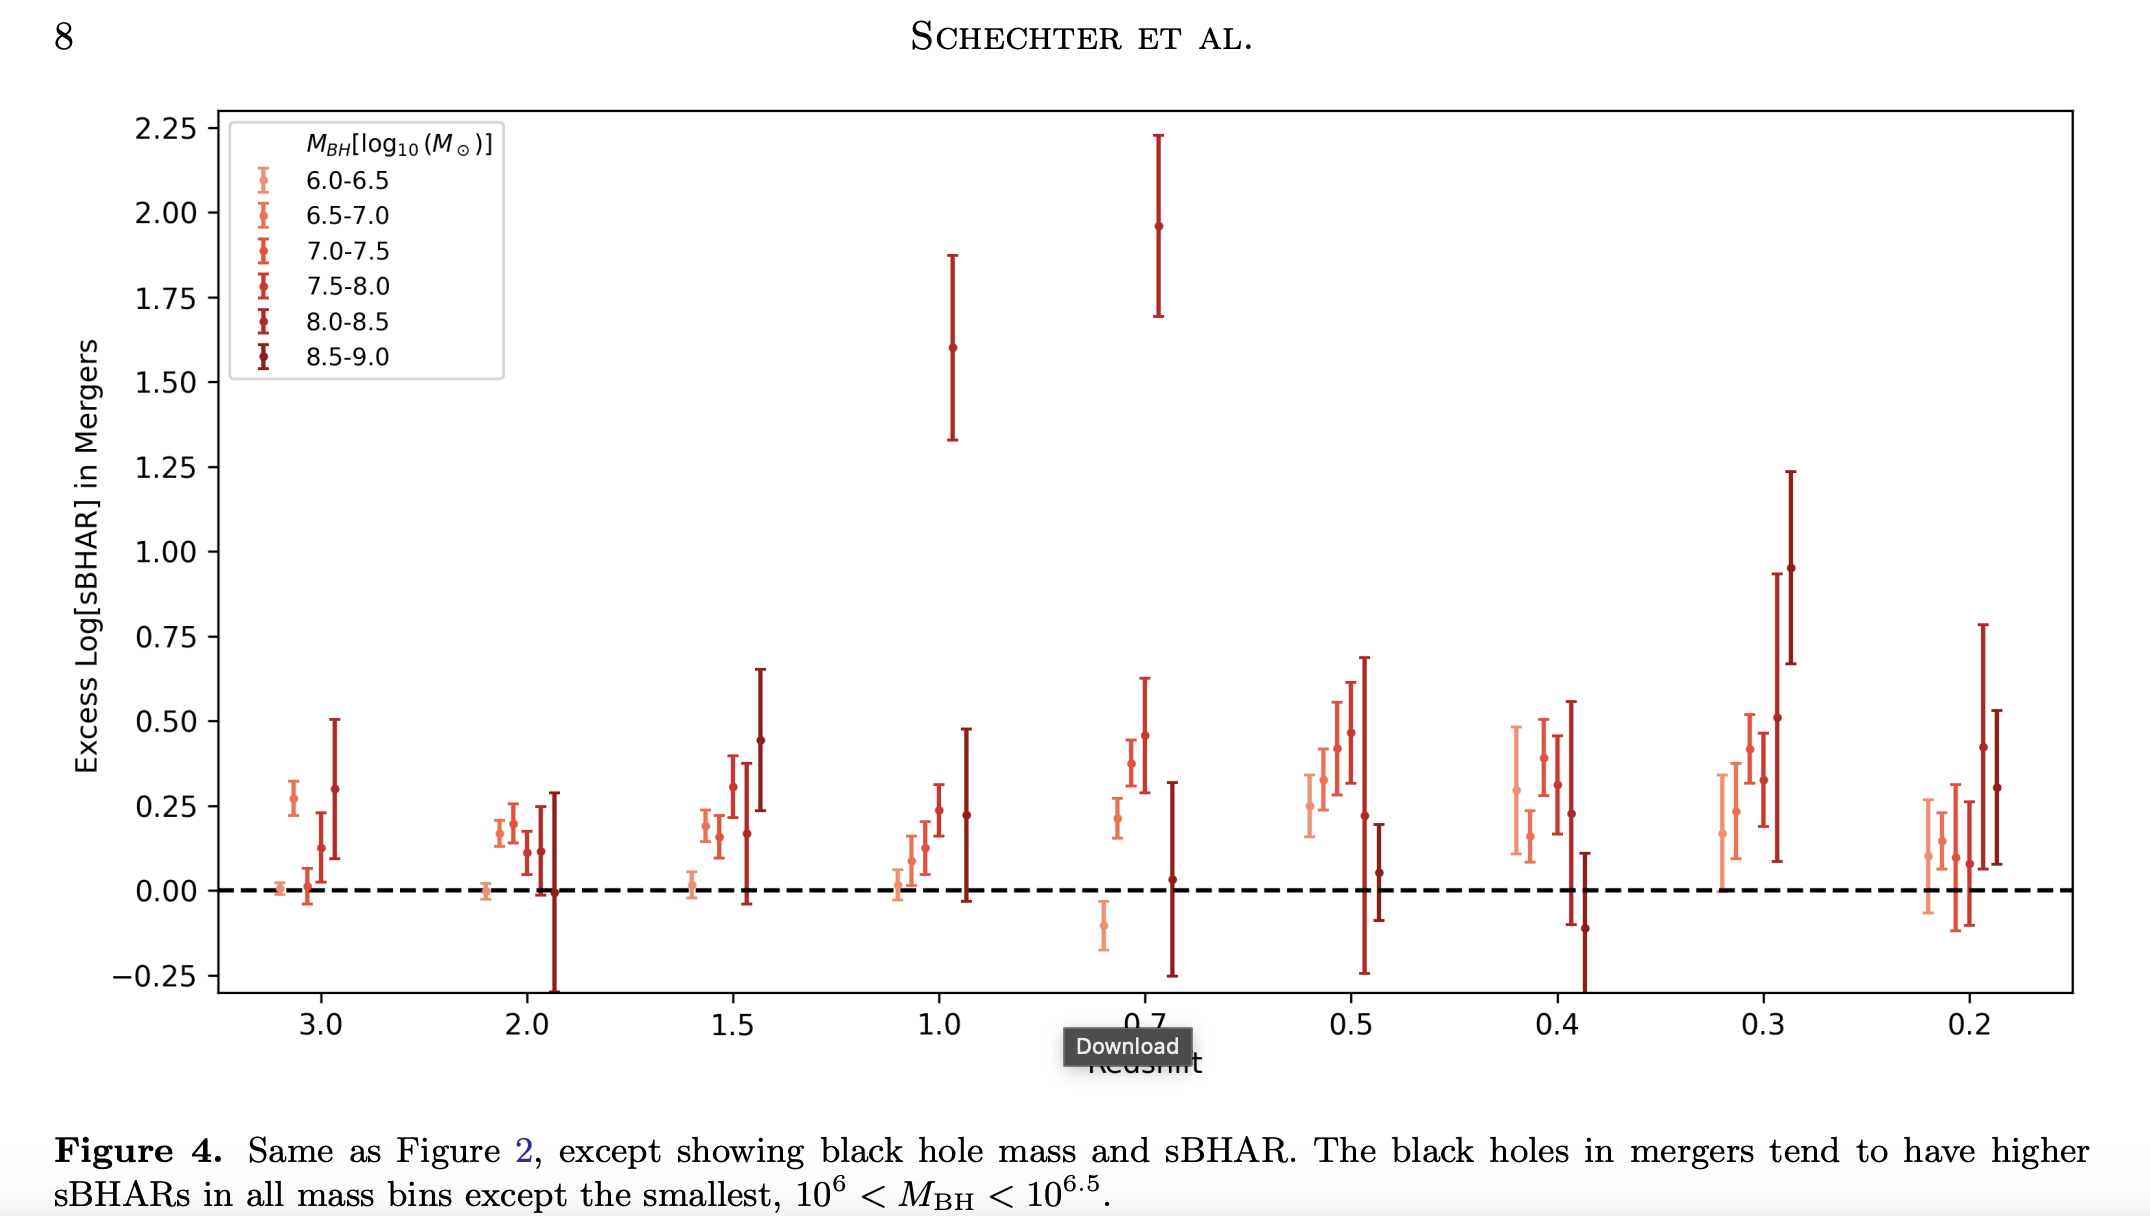

In [60]:
sSFR_returns(z_l,z_u,Mstar_l,Mstar_u)

array([ 0.99620445, -1.15324162, -0.06262361,  0.98726788])

In [65]:
z_u-z_l

2

<ErrorbarContainer object of 3 artists>

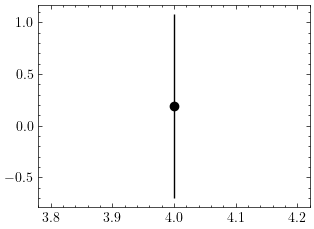

In [55]:
np.mean(sSFR_returns(4,5,1e4,1e6))




0.19190177257768126

In [56]:
sSFR_enhancement_per_zbins = sSFR_enhancements[(sSFR_enhancements>=z_bins[0])&(sSFR_enhancements<z_bins[1])]

In [51]:
Mstars_per_zbins = sSFR_enhancement_Mstar[(sSFR_enhancements>=z_bins[0])&(sSFR_enhancements<z_bins[1])]

In [53]:
Mstars_per_zbins[(Mstars_per_zbins>=Mstar_bins[0])&(Mstars_per_zbins<Mstar_bins[1])]

array([162276.30001334, 295526.0047573 ])

In [278]:
np.mean(sSFR_enhancement_z[sSFR_enhancements<0])

3.5074047627172478

In [ ]:
z_merging_pop = merging_pop['z'][:][valid_control_mask]
z_control_pop = non_merging_z[control_indices[0][valid_control_mask]]

Mstar_merging_pop = merging_pop['Mstar'][:][valid_control_mask]
Mstar_control_pop = non_merging_Mstar[control_indices[0][valid_control_mask]]


In [ ]:
z_min = 0
z_max = 15
z_binsize = 1

Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z)

avg_sSFR_control = []
std_sSFR_control = []

avg_sSFR_merger = []
std_sSFR_merger = []

# Loop through redshift bins
for i in range(len(z_bins) - 1):
    # Create masks for merging and control populations within each redshift bin
    merger_z_mask = (z_merging_pop > z_bins[i]) & (z_merging_pop < z_bins[i + 1])
    control_z_mask = (z_control_pop > z_bins[i]) & (z_control_pop < z_bins[i + 1])

    sSFR_merging_pop_filtered = sSFR_merging_pop[merger_z_mask]
    sSFR_control_pop_filtered = sSFR_control_pop[control_z_mask]


### Mdot vs redshift

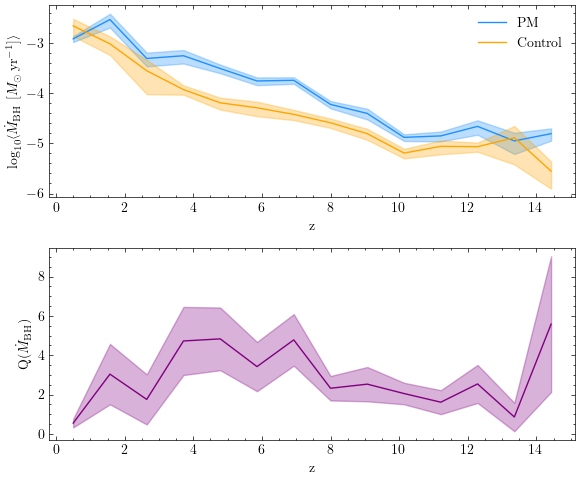

In [234]:
Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z)

avg_Mdot_control = []
std_Mdot_control = []

avg_Mdot_merger = []
std_Mdot_merger = []

# Loop through redshift bins
for i in range(len(z_bins) - 1):
    # Create masks for merging and control populations within each redshift bin
    merger_z_mask = (z_merging_pop > z_bins[i]) & (z_merging_pop < z_bins[i+1])
    control_z_mask = (z_control_pop > z_bins[i]) & (z_control_pop < z_bins[i+1])

    # Get the Mdot for each population
    Mdot_merging_pop_filtered = Mdot_merging_pop[merger_z_mask]
    Mdot_control_pop_filtered = Mdot_control_pop[control_z_mask]

    avg_Mdot_merger.append(np.mean(Mdot_merging_pop_filtered))
    std_Mdot_merger.append(np.std(Mdot_merging_pop_filtered) / np.sqrt(len(Mdot_merging_pop_filtered)))

    avg_Mdot_control.append(np.mean(Mdot_control_pop_filtered))
    std_Mdot_control.append(np.std(Mdot_control_pop_filtered) / np.sqrt(len(Mdot_control_pop_filtered)))

avg_Mdot_merger = np.array(avg_Mdot_merger)
std_Mdot_merger = np.array(std_Mdot_merger)

avg_Mdot_control = np.array(avg_Mdot_control)
std_Mdot_control = np.array(std_Mdot_control)

Q_Mdot = avg_Mdot_merger / avg_Mdot_control
Q_Mdot_SE = Q_Mdot * np.sqrt((std_Mdot_merger / avg_Mdot_merger) ** 2 + (std_Mdot_control / avg_Mdot_control) ** 2)

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(6, 5))
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_Mdot_merger[avg_Mdot_merger > 0]), label='PM', color='dodgerblue')
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_Mdot_merger - std_Mdot_merger), np.log10(avg_Mdot_merger + std_Mdot_merger), alpha=0.3, color='dodgerblue')

ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_Mdot_control[avg_Mdot_control > 0]), label='Control', color="orange")
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_Mdot_control - std_Mdot_control), np.log10(avg_Mdot_control + std_Mdot_control), alpha=0.3, color='orange')

ax[0].legend()
ax[0].set_xlabel('z')
ax[0].set_ylabel(r'$\log_{10}\langle \dot{M}_{\mathrm{BH}} \; [M_{\odot} \, \mathrm{yr}^{-1}]\rangle$')

ax[1].plot(z_bins[:-1] + z_binsize / 2, Q_Mdot, color='purple')
ax[1].fill_between(z_bins[:-1] + z_binsize / 2, Q_Mdot - Q_Mdot_SE, Q_Mdot + Q_Mdot_SE, alpha=0.3, color='purple')
ax[1].set_xlabel('z')
ax[1].set_ylabel('Q($\dot{M}_{\mathrm{BH}}$)')
#ax[1].set_ylim(0, 5)

# Final layout adjustments
fig.tight_layout()

## Doing the control analysis with only > 1e8 Msun BHs

In [52]:
merging_points = np.column_stack((merging_pop['z'][merging_pop['Mstar']>=1e8],np.log10(merging_pop['Mstar'][merging_pop['Mstar']>=1e8])))
non_merging_points = np.column_stack((non_merging_pop['z'][non_merging_pop['Mstar']>=1e8],np.log10(non_merging_pop['Mstar'][non_merging_pop['Mstar']>=1e8])))
tree = cKDTree(non_merging_points)
used = np.zeros(len(non_merging_points), dtype=bool)

control_indices = []

while True:
    closest_indices = np.full(len(merging_points), -1)
    
    tolerances = []
    for i in tqdm(range(len(merging_points)), desc="Processing merging points", ncols=100):
        #find the closest neibhour 
        dist, min_idx = tree.query(merging_points[i])
        if(used[min_idx]):
            dists,idxs = tree.query(merging_points[i],k=len(non_merging_points))
            min_idx = idxs[np.where(~used[idxs])[0][0]] 

        #check for tolerance:
        del_z = np.abs(merging_points[i][0]-non_merging_points[min_idx][0])
        dex_Mstar = np.abs(np.log10(merging_points[i][1]/non_merging_points[min_idx][1]))

        z_tolerance = 0.05
        Mstar_dex_tolerance = 0.1

        while True:
            if(del_z<z_tolerance and dex_Mstar<Mstar_dex_tolerance):
                used[min_idx] = True
                closest_indices[i] = min_idx
                tolerances.append((z_tolerance, Mstar_dex_tolerance))
                break
            else:
                z_tolerance = z_tolerance*1.5
                Mstar_dex_tolerance = Mstar_dex_tolerance*1.5
                if(z_tolerance>0.6 or Mstar_dex_tolerance>0.6):
                    # print("Could not find a match for merging point:", i)
                    # print(del_z, dex_Mstar)
                    # print("Last tolerances:", z_tolerance, Mstar_dex_tolerance)
                    closest_indices[i] = -1
                    break

                

    control_indices.append(closest_indices)
        #D_mstar, p_Mstar = ks_2samp(pop['non_merging_population']['Mstar'][np.sort(closest_indices)],pop['merging_population']['Mstar'])
        #D_z, p_z = ks_2samp(pop['non_merging_population']['z'][np.sort(closest_indices)],pop['merging_population']['z'])
        
        #print(p_z,p_Mstar,np.shape(control_indices)[0])
        #print(z_tolerance,Mstar_dex_tolerance)

    if np.shape(control_indices)[0]>=1:
        break


Processing merging points: 100%|██████████████████████████████| 1117/1117 [00:00<00:00, 5068.51it/s]


In [53]:
print("Number of cases where a close enough match is not found within the acceptable tolerance:",np.sum(control_indices[0]==-1))

Number of cases where a close enough match is not found within the acceptable tolerance: 443


In [54]:
valid_control_mask = control_indices[0]!=-1
print("number of processable mergers with valid controls:")
print(len(control_indices[0][valid_control_mask]))

number of processable mergers with valid controls:
674


Text(0.5, 0.98, 'BRAHMA output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3')

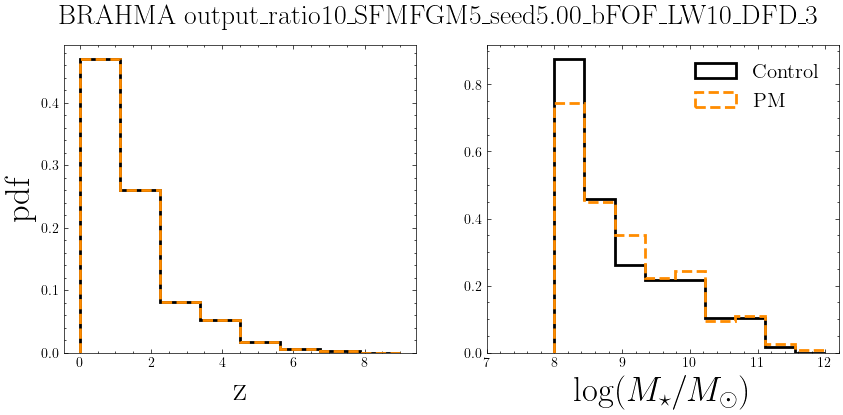

In [56]:
Mstar_binsize = 0.4
Mstar_min = 8
Mstar_max = 12
Nbins_Ms = int((Mstar_max - Mstar_min) / Mstar_binsize)
Mstar_bins = np.linspace(Mstar_min, Mstar_max, Nbins_Ms)

z_binsize = 1
z_min = 0
z_max = 9
Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z )

fig,ax = plt.subplots(1,2,figsize=(10,4))

ax[0].hist(non_merging_pop['z'][non_merging_pop['Mstar']>=1e8][control_indices[0][valid_control_mask]], bins=z_bins, color="black", histtype="step",linewidth=2,density=True)
ax[0].hist(merging_pop['z'][merging_pop['Mstar']>=1e8][valid_control_mask], bins=z_bins, histtype="step",color="Darkorange",linestyle="--",linewidth=2,density=True)
ax[0].set_xlabel("z",fontsize=25)
ax[0].set_ylabel("pdf",fontsize=25)
#ax[0].set_xticks([0,1,2,3,4,5])


ax[1].hist(np.log10(non_merging_pop['Mstar'][non_merging_pop['Mstar']>=1e8][control_indices[0][valid_control_mask]]), bins=Mstar_bins,histtype="step",color="black",label="Control",linewidth=2,density=True)
ax[1].hist(np.log10(merging_pop['Mstar'][merging_pop['Mstar']>=1e8][valid_control_mask]),bins=Mstar_bins,histtype="step",label="PM",color="Darkorange",linestyle="--",linewidth=2,density=True)
ax[1].set_xticks([7,8,9,10,11,12])
ax[1].legend(fontsize=15)
ax[1].set_xlabel("$\log(M_{\star}/M_{\odot})$",fontsize=25)

fig.suptitle("BRAHMA "+brahma_run_name,fontsize=20)

In [58]:
z_merging_pop = merging_pop['z'][merging_pop['Mstar']>=1e8][valid_control_mask]
z_control_pop = non_merging_pop['z'][non_merging_pop['Mstar']>=1e8][control_indices[0][valid_control_mask]]

Mstar_merging_pop = merging_pop['Mstar'][merging_pop['Mstar']>=1e8][valid_control_mask]
Mstar_control_pop = non_merging_pop['Mstar'][non_merging_pop['Mstar']>=1e8][control_indices[0][valid_control_mask]]

MBH_merging_pop = merging_pop['MBH'][merging_pop['Mstar']>=1e8][valid_control_mask]
MBH_control_pop = non_merging_pop['MBH'][non_merging_pop['Mstar']>=1e8][control_indices[0][valid_control_mask]]

SFR_merging_pop = merging_pop['SFR'][merging_pop['Mstar']>=1e8][valid_control_mask]
SFR_control_pop = non_merging_pop['SFR'][non_merging_pop['Mstar']>=1e8][control_indices[0][valid_control_mask]]

sSFR_merging_pop = SFR_merging_pop/Mstar_merging_pop
sSFR_control_pop = SFR_control_pop/Mstar_control_pop

# Mgas_merging_pop = merging_pop['Mgas'][:][valid_control_mask]
# Mgas_control_pop = non_merging_pop['Mgas'][:][control_indices[0][valid_control_mask]]

# fgas_merging_pop = Mgas_merging_pop/(Mgas_merging_pop+Mstar_merging_pop)
# fgas_control_pop = Mgas_control_pop/(Mgas_control_pop+Mstar_control_pop)

Mdot_merging_pop = merging_pop['Mdot'][merging_pop['Mstar']>=1e8][valid_control_mask]
Mdot_control_pop = non_merging_pop['Mdot'][non_merging_pop['Mstar']>=1e8][control_indices[0][valid_control_mask]]

In [69]:
np.mean(SFR_merging_pop)/np.mean(SFR_control_pop)

1.236565259014567

In [70]:
np.mean(sSFR_merging_pop)/np.mean(sSFR_control_pop)

1.0040644257730456

In [66]:
bin_settings = {
            'sSFR': {'binsize': 0.2, 'bin_min': -14, 'bin_max': -7},
            'Mgas': {'binsize': 0.2, 'bin_min': 5, 'bin_max': 14},
            'fgas': {'binsize': 0.05, 'bin_min': 0, 'bin_max': 1},
            'Mdot': {'binsize': 0.2, 'bin_min': -8, 'bin_max': 1},
            }


properties = {
            'sSFR': (np.log10(sSFR_merging_pop[sSFR_merging_pop > 0]), np.log10(sSFR_control_pop[sSFR_control_pop > 0])),
            'Mdot': (np.log10(Mdot_merging_pop[Mdot_merging_pop > 0]), np.log10(Mdot_control_pop[Mdot_control_pop > 0]))
        }


properties_xlabel = {
            'sSFR': r"$\log_{10}(\mathrm{sSFR}[\mathrm{yr}^{-1}])$",
            'Mdot': r"$\log_{10}(\dot{M}_{\mathrm{BH}}[M_{\odot}\, \mathrm{yr}^{-1}])$",
            'Mgas': r"$\log_{10}(M_{\mathrm{gas}}[M_{\odot}])$",
            'fgas': r"$f_{\mathrm{gas}}$",
            }

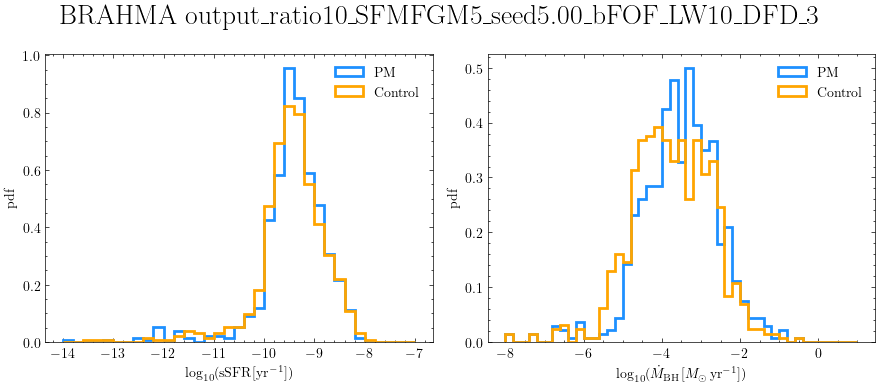

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
axes = axes.flatten()

for i, (prop_name, (prop_merging, prop_control)) in enumerate(properties.items()):
    binsize = bin_settings[prop_name].get('binsize')
    bin_min = bin_settings[prop_name].get('bin_min')
    bin_max = bin_settings[prop_name].get('bin_max')
    bins = np.arange(bin_min, bin_max + binsize, binsize)
        
            # Plot histograms
    axes[i].hist(prop_merging, bins=bins,color='dodgerblue', label='PM', density=True,histtype="step", linewidth=2)
    axes[i].hist(prop_control, bins=bins,color='orange', label='Control', density=True,histtype="step", linewidth=2)
    axes[i].set_xlabel(properties_xlabel[prop_name])
    axes[i].set_ylabel('pdf')
    axes[i].legend()

fig.suptitle("BRAHMA "+brahma_run_name,fontsize=20)
fig.tight_layout()

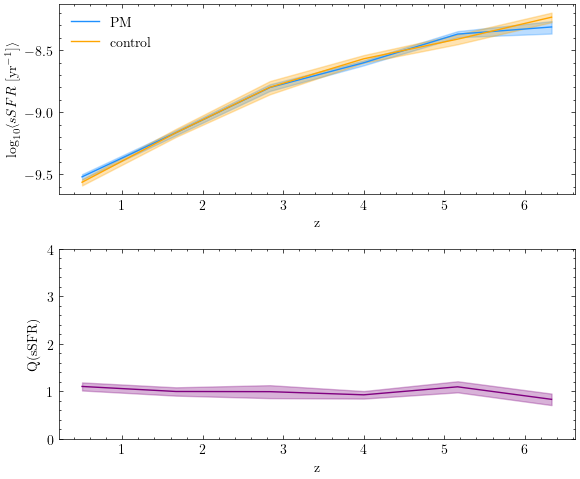

In [64]:
z_min = 0
z_max = 7
z_binsize = 1

Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z)

avg_sSFR_control = []
std_sSFR_control = []

avg_sSFR_merger = []
std_sSFR_merger = []

# Loop through redshift bins
for i in range(len(z_bins) - 1):
    # Create masks for merging and control populations within each redshift bin
    merger_z_mask = (z_merging_pop > z_bins[i]) & (z_merging_pop < z_bins[i + 1])
    control_z_mask = (z_control_pop > z_bins[i]) & (z_control_pop < z_bins[i + 1])

    sSFR_merging_pop_filtered = sSFR_merging_pop[merger_z_mask]
    sSFR_control_pop_filtered = sSFR_control_pop[control_z_mask]

    avg_sSFR_merger.append(np.mean(sSFR_merging_pop_filtered))
    std_sSFR_merger.append(np.std(sSFR_merging_pop_filtered) / np.sqrt(len(sSFR_merging_pop_filtered)))

    avg_sSFR_control.append(np.mean(sSFR_control_pop_filtered))
    std_sSFR_control.append(np.std(sSFR_control_pop_filtered) / np.sqrt(len(sSFR_control_pop_filtered)))

avg_sSFR_merger = np.array(avg_sSFR_merger)
std_sSFR_merger = np.array(std_sSFR_merger)

avg_sSFR_control = np.array(avg_sSFR_control)
std_sSFR_control = np.array(std_sSFR_control)

Q_sSFR = avg_sSFR_merger / avg_sSFR_control
Q_sSFR_SE = Q_sSFR * np.sqrt((std_sSFR_merger / avg_sSFR_merger) ** 2 + (std_sSFR_control / avg_sSFR_control) ** 2)

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(6, 5))
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_merger[avg_sSFR_merger > 0]), label='PM', color="dodgerblue")
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_merger - std_sSFR_merger), np.log10(avg_sSFR_merger + std_sSFR_merger), alpha=0.3, color='dodgerblue')
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_control[avg_sSFR_control > 0]), label='control', color='orange')
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_control - std_sSFR_control), np.log10(avg_sSFR_control + std_sSFR_control), alpha=0.3, color='orange')
ax[0].legend()
ax[0].set_xlabel('z')
ax[0].set_ylabel(r'$\log_{10}\langle sSFR \; [\mathrm{yr}^{-1}]\rangle$')

ax[1].plot(z_bins[:-1] + z_binsize / 2, Q_sSFR, color='purple')
ax[1].fill_between(z_bins[:-1] + z_binsize / 2, Q_sSFR - Q_sSFR_SE, Q_sSFR + Q_sSFR_SE, alpha=0.3, color='purple')
ax[1].set_xlabel('z')
ax[1].set_ylabel('Q(sSFR)')
ax[1].set_ylim(0, 4)

# Final layout adjustments
fig.tight_layout()

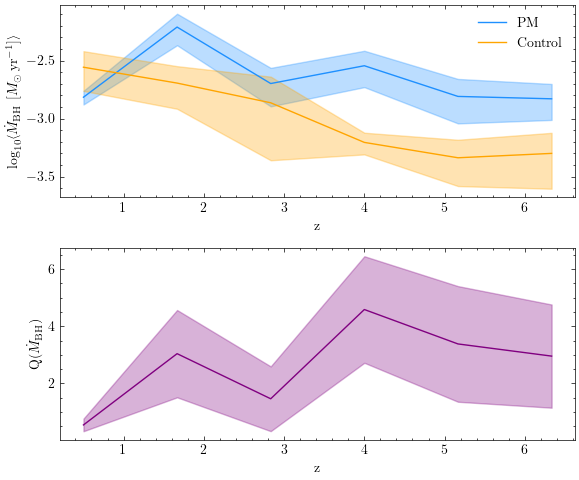

In [65]:
Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z)

avg_Mdot_control = []
std_Mdot_control = []

avg_Mdot_merger = []
std_Mdot_merger = []

# Loop through redshift bins
for i in range(len(z_bins) - 1):
    # Create masks for merging and control populations within each redshift bin
    merger_z_mask = (z_merging_pop > z_bins[i]) & (z_merging_pop < z_bins[i+1])
    control_z_mask = (z_control_pop > z_bins[i]) & (z_control_pop < z_bins[i+1])

    # Get the Mdot for each population
    Mdot_merging_pop_filtered = Mdot_merging_pop[merger_z_mask]
    Mdot_control_pop_filtered = Mdot_control_pop[control_z_mask]

    avg_Mdot_merger.append(np.mean(Mdot_merging_pop_filtered))
    std_Mdot_merger.append(np.std(Mdot_merging_pop_filtered) / np.sqrt(len(Mdot_merging_pop_filtered)))

    avg_Mdot_control.append(np.mean(Mdot_control_pop_filtered))
    std_Mdot_control.append(np.std(Mdot_control_pop_filtered) / np.sqrt(len(Mdot_control_pop_filtered)))

avg_Mdot_merger = np.array(avg_Mdot_merger)
std_Mdot_merger = np.array(std_Mdot_merger)

avg_Mdot_control = np.array(avg_Mdot_control)
std_Mdot_control = np.array(std_Mdot_control)

Q_Mdot = avg_Mdot_merger / avg_Mdot_control
Q_Mdot_SE = Q_Mdot * np.sqrt((std_Mdot_merger / avg_Mdot_merger) ** 2 + (std_Mdot_control / avg_Mdot_control) ** 2)

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(6, 5))
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_Mdot_merger[avg_Mdot_merger > 0]), label='PM', color='dodgerblue')
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_Mdot_merger - std_Mdot_merger), np.log10(avg_Mdot_merger + std_Mdot_merger), alpha=0.3, color='dodgerblue')

ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_Mdot_control[avg_Mdot_control > 0]), label='Control', color="orange")
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_Mdot_control - std_Mdot_control), np.log10(avg_Mdot_control + std_Mdot_control), alpha=0.3, color='orange')

ax[0].legend()
ax[0].set_xlabel('z')
ax[0].set_ylabel(r'$\log_{10}\langle \dot{M}_{\mathrm{BH}} \; [M_{\odot} \, \mathrm{yr}^{-1}]\rangle$')

ax[1].plot(z_bins[:-1] + z_binsize / 2, Q_Mdot, color='purple')
ax[1].fill_between(z_bins[:-1] + z_binsize / 2, Q_Mdot - Q_Mdot_SE, Q_Mdot + Q_Mdot_SE, alpha=0.3, color='purple')
ax[1].set_xlabel('z')
ax[1].set_ylabel('Q($\dot{M}_{\mathrm{BH}}$)')
#ax[1].set_ylim(0, 5)

# Final layout adjustments
fig.tight_layout()